In [252]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


In [253]:
df = pd.read_csv("kc_house_data.csv")

In [254]:
df.shape

(21613, 21)

In [255]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [256]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [257]:
df.isnull().sum().sum()

0

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [259]:
# Getting the year of release from Date column
df.date = pd.Series(data=list(map(lambda x: x[:4], df.date)), name="date")
# Converting date column to integer
df = df.astype({"date": np.int64})

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

lg = LinearRegression()
poly = PolynomialFeatures(degree=3)

x_train, x_test, y_train, y_test = train_test_split(df.drop("price", axis=1), df.price, train_size=0.80, test_size=0.20, random_state=40)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

lg.fit(x_train, y_train)
predicted = lg.predict(x_test)


print("MSE", mean_squared_error(y_test, predicted))
print("R squared", metrics.r2_score(y_test, predicted))


MSE 117362917897.27975
R squared 0.06704889940401226


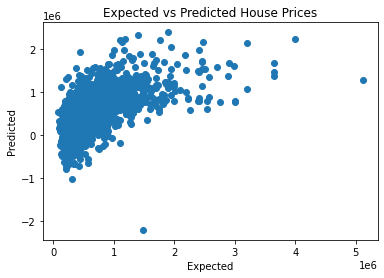

In [261]:
plt.scatter(y_test,predicted)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Expected vs Predicted House Prices")
plt.show()

We notice that by feeding the model raw data without selecting specific features, it yields a huge MSE and 0.067 R-squred values, this means that the model is correctly predicting only 6.7% of house prices.

## Analysing the dataset

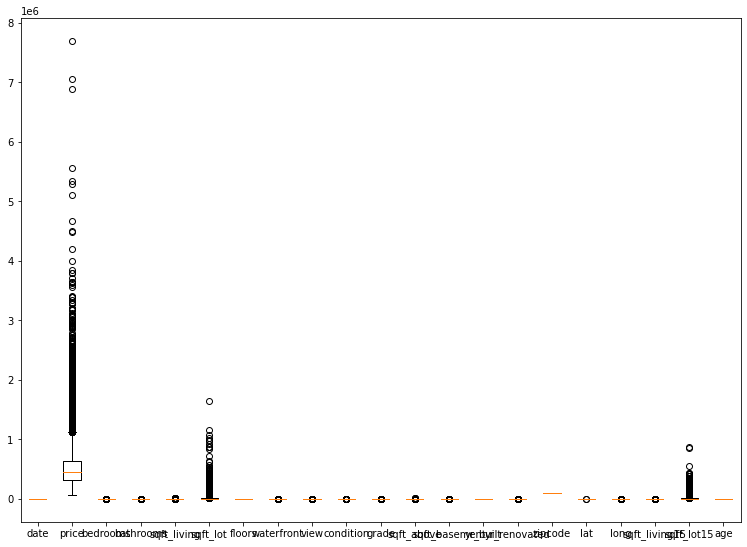

In [326]:
# Multiple Boxplots.
data = df.drop("id", axis=1)
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(data)

ax.set_xticklabels(data.columns)

plt.show()

Renovated houses: 0.042


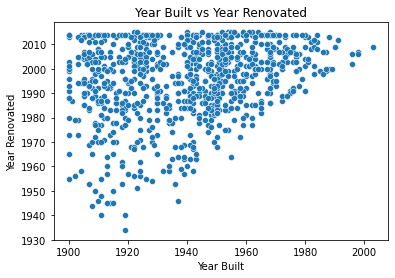

In [289]:
# Exploring house age
print("Renovated houses: %.3f" % (df[df.yr_renovated!=0].size/df.size))
sns.scatterplot(data=df[df.yr_renovated!=0], x="yr_built", y="yr_renovated")
plt.title("Year Built vs Year Renovated")
plt.xlabel("Year Built")
plt.ylabel("Year Renovated")
plt.show()

We notice that over 4.2% of houses were renovated, yet it's important to add the age of the house to the dataset as we'll notice its impact on the model's prediction later on.

In [263]:
# Creating a new column called Age describing the house's age
age = []
x = df[["date", "yr_renovated", "yr_built"]]
for i in range(len(x)):
    age.append(x.loc[i][0] - x.loc[i][1] if x.loc[i][1] !=0 else x.loc[i][0] - x.loc[i][2])
age = pd.Series(data=age, name="age")
df = df.join(age)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,23
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28


In [264]:
def plot_correlation_map( df , annot=True):
    corr = df.corr()
    s , ax = plt.subplots( figsize = [10 , 10])
    cmap = sns.diverging_palette( 10 , 220 , as_cmap = True )

    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = annot, 
        annot_kws = { 'fontsize' : 8 },
        mask=mask
        )

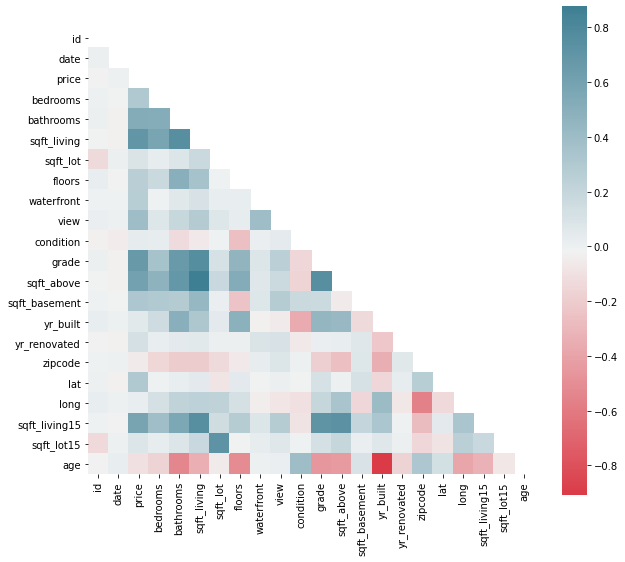

In [328]:
plot_correlation_map(df, False)

## Feature Selection

From the heatmap above and the prior knowledge we have about the what each feature represents, we are confident that the following features are important for the linear regression model during training.
Selected features:
- Sqft Living
- Sqft Lot
- View
- Grade
- Condition
- Age
- Sqft Living for the 15 nearby houses
- Sqft lot for the 15 nearby houses

It would be a great challenge to try and figure out whether the house's location (Longitude, Latitude) have any impact on the house price, however, that would require additional research on what drives realestate prices in the area which is out of the scope of this exercise.

In [293]:
# Selecting features
selected_features = df[["sqft_living", "sqft_lot", "view", "grade", "condition", "age", "sqft_living15", "sqft_lot15", "price"]]

## Retraining the model

### Linear Regression

In [312]:
lg = LinearRegression()

data = selected_features
# Splitting dataset into training and test
# Linear Regression using house grade
x_train, x_test, y_train, y_test = train_test_split(data.grade, data.price, train_size=0.70, test_size=0.30, random_state=40)

lg.fit(x_train.values[:, np.newaxis], y_train.values)
# Measure the performance of linear regression
predicted = lg.predict(x_test.values[:, np.newaxis])

print("MSE", mean_squared_error(y_test, predicted))
print("R squared", metrics.r2_score(y_test, predicted))


MSE 69844149619.10722
R squared 0.4567031514856129


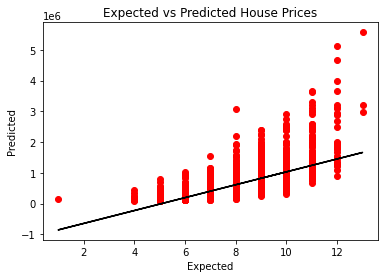

In [313]:
plt.scatter(x_test,y_test,color="r")
plt.title("Expected vs Predicted House Prices")
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.plot(x_test,predicted,color="k")

plt.show()

### Multi-linear Regression

In [323]:
x_train, x_test, y_train, y_test = train_test_split(data.drop("price", axis=1), data.price, test_size=0.30, random_state=40)

lg.fit(x_train, y_train)
# Measure the performance of linear regression
predicted = lg.predict(x_test)

print("MSE", mean_squared_error(y_test, predicted))
print("R squared", metrics.r2_score(y_test, predicted))


MSE 47988599165.83498
R squared 0.626710972449355


Compared to the linear regression, by adding other features, we are getting higher R-squared values, meaning the model is fitting our data better, exactly 62.6% of data is corretly predicted.

### Polynomial Regression

In [321]:
x_train, x_test, y_train, y_test = train_test_split(data.drop("price", axis=1), data.price, test_size=0.25, random_state=40)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

lg.fit(x_train, y_train)
predicted = lg.predict(x_test)


print("MSE", mean_squared_error(y_test, predicted))
print("R squared", metrics.r2_score(y_test, predicted))

MSE 37940780688.80938
R squared 0.701647196099034


We notice that using polynomial regression yields better results, the model correctly predicts 70% of the prices correctly.